In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [256]:
from urllib.request import urlopen
url = 'https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv'
try:
    with urlopen(url) as response:
        df = pd.read_csv(response)
    print(df.head())
except Exception as e:
    print(f"Error: {e}")

Error: Error tokenizing data. C error: Expected 1 fields in line 41, saw 16



In [257]:
df=pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [258]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory data Analysis

In [259]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [260]:
df.shape

(614, 13)

In [261]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [262]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [263]:
print(f'the rows and coulumnin dataset:{df.shape}')
print(f'\n The column headers in the dataset:{df.columns}')

the rows and coulumnin dataset:(614, 13)

 The column headers in the dataset:Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [265]:
df.isnull().sum().sum()

149

<Axes: >

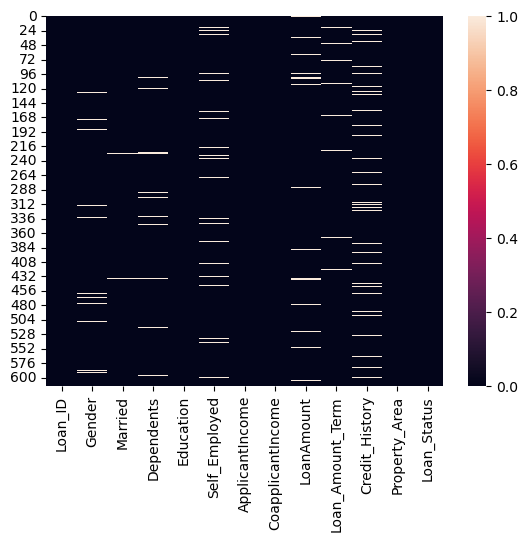

In [266]:
sns.heatmap(df.isnull())

In [267]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [268]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [269]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [271]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

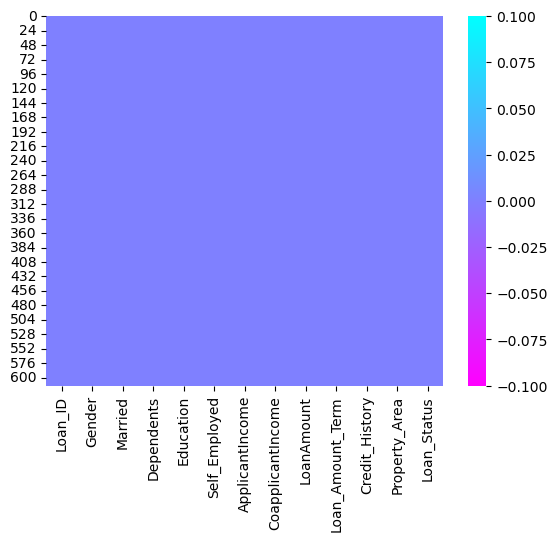

In [272]:
sns.heatmap(df.isnull(),cmap='cool_r')

In [273]:
df.drop('Loan_ID', axis=1, inplace=True)

# separating numerical and categorical data

In [274]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns:', categorical_col)
print('\n')

categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']




In [275]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:', numerical_col)
print('\n')

numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




In [276]:
df.nunique().to_frame('No of unique value')

,No of unique value
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11
Credit_History,3


In [277]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Description of Dataset

In [278]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Data Visualization

Y    422
N    192
Name: Loan_Status, dtype: int64


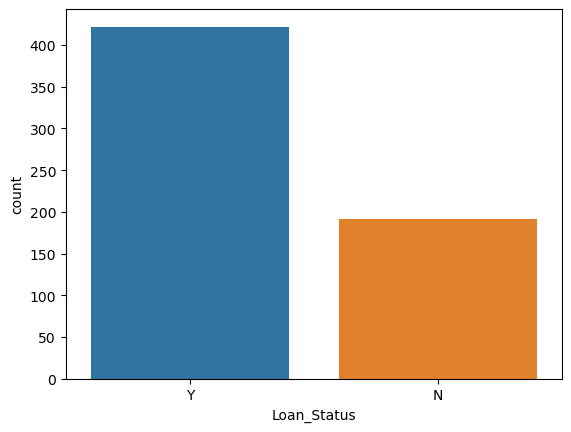

In [279]:
ax=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64


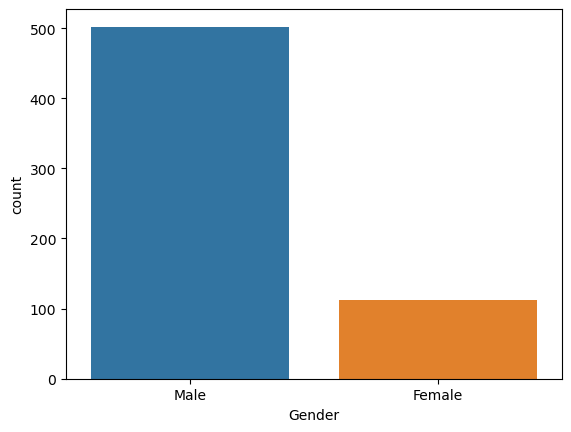

In [280]:
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

In [281]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0     

Yes    401
No     213
Name: Married, dtype: int64


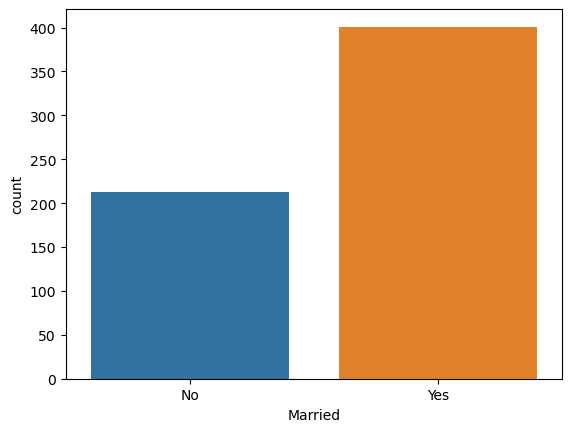

In [282]:
print(df['Married'].value_counts())
ax=sns.countplot(x='Married',data=df)
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


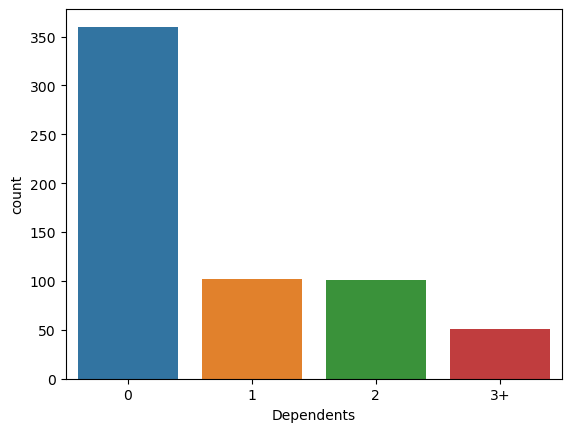

In [283]:
print(df['Dependents'].value_counts())
ax=sns.countplot(x='Dependents',data=df)
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


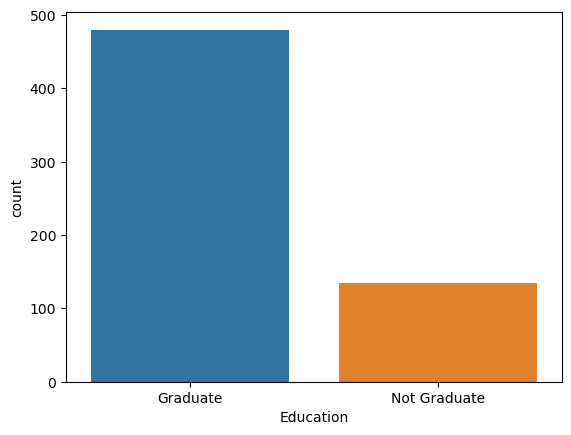

In [284]:
print(df['Education'].value_counts())
ax=sns.countplot(x='Education',data=df)
plt.show()

In [285]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

No     532
Yes     82
Name: Self_Employed, dtype: int64


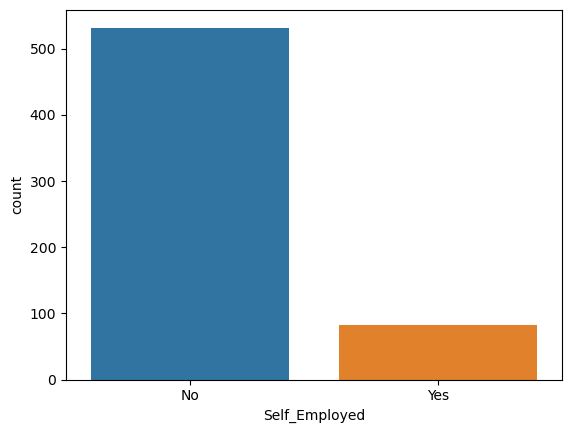

In [286]:
print(df['Self_Employed'].value_counts())
ax=sns.countplot(x='Self_Employed',data=df)
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


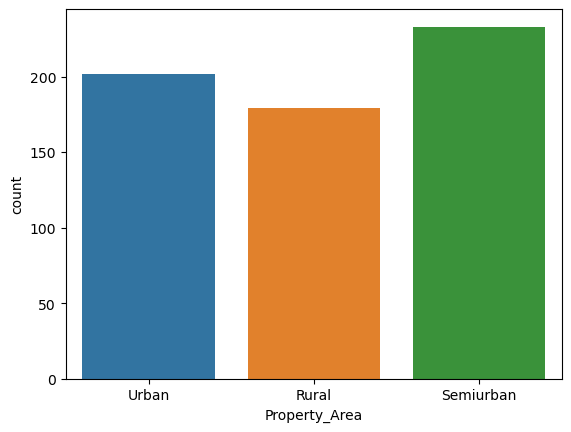

In [287]:
print(df['Property_Area'].value_counts())
ax=sns.countplot(x='Property_Area',data=df)
plt.show()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


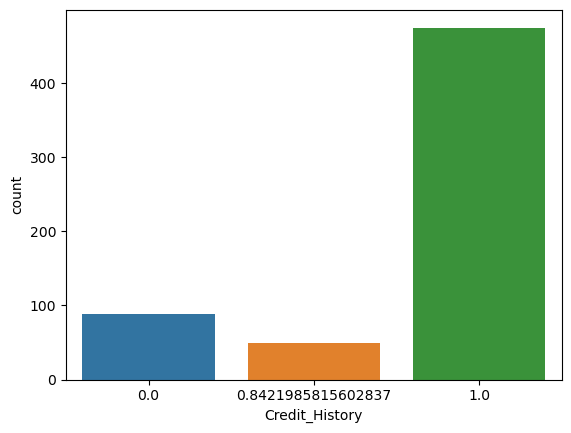

In [288]:
print(df['Credit_History'].value_counts())
ax=sns.countplot(x='Credit_History',data=df)
plt.show()

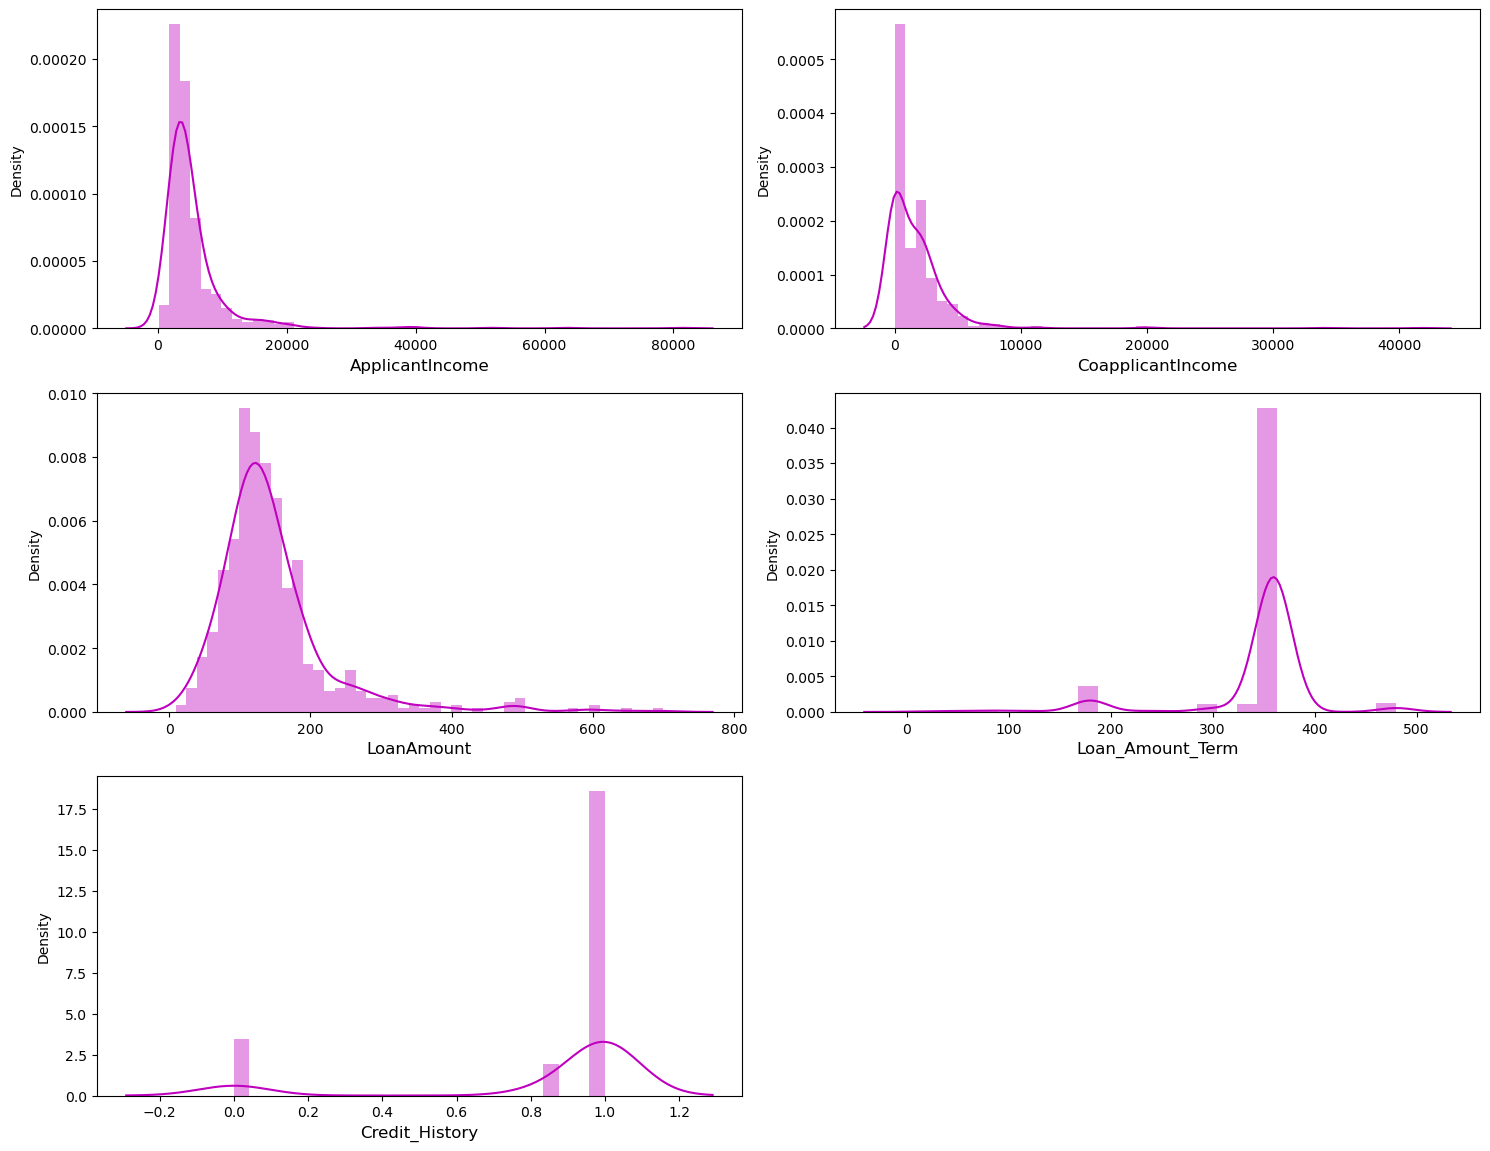

In [289]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber) 
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber +=1
plt.tight_layout()

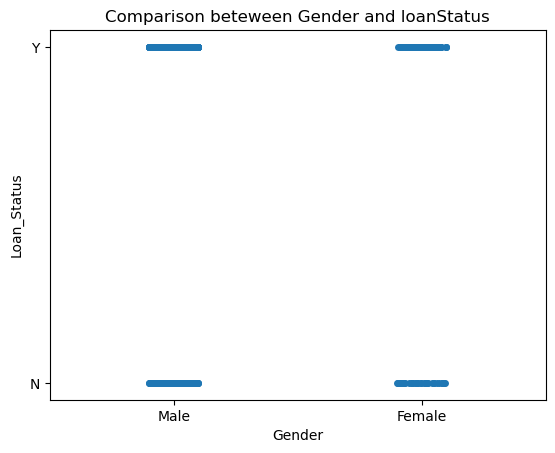

In [290]:
plt.title('Comparison beteween Gender and loanStatus')
sns.stripplot(x='Gender', y='Loan_Status',data=df)
plt.show()

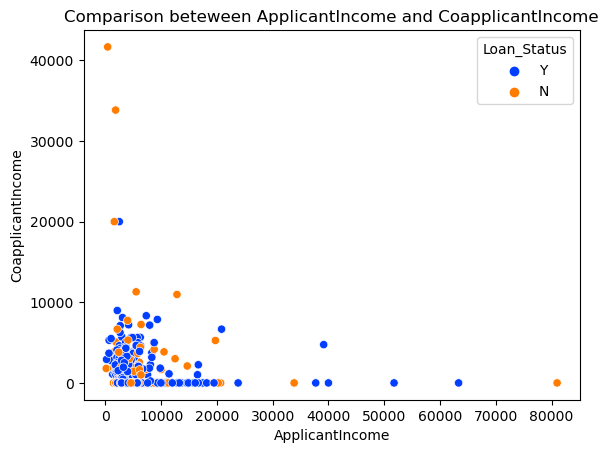

In [291]:
plt.title('Comparison beteween ApplicantIncome and CoapplicantIncome')
sns.scatterplot(y='CoapplicantIncome', x='ApplicantIncome',data=df, hue='Loan_Status',palette='bright')
plt.show()

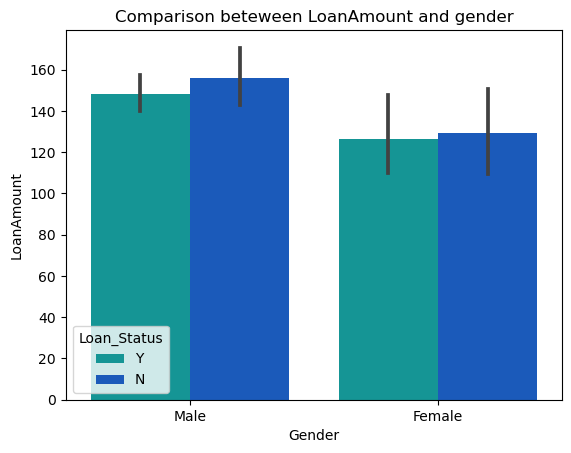

In [292]:
plt.title('Comparison beteween LoanAmount and gender')
sns.barplot(x='Gender', y='LoanAmount',data=df, palette='winter_r', hue='Loan_Status')
plt.show()

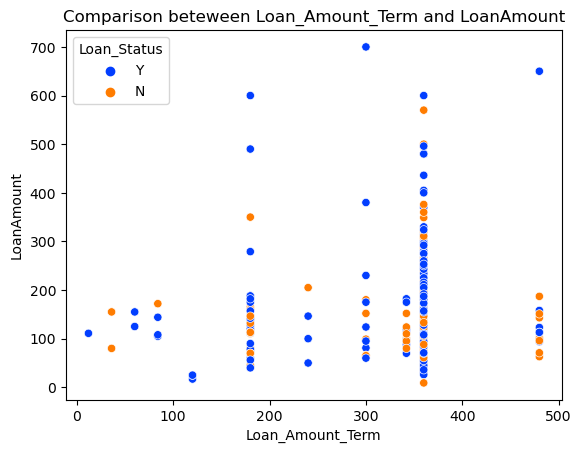

In [293]:
plt.title('Comparison beteween Loan_Amount_Term and LoanAmount')
sns.scatterplot(y='LoanAmount', x='Loan_Amount_Term',data=df, hue='Loan_Status',palette='bright')
plt.show()

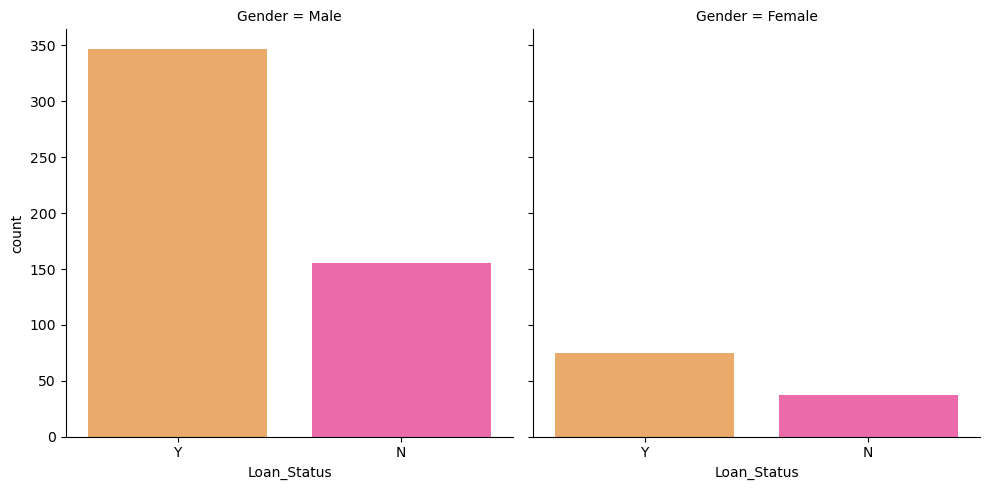

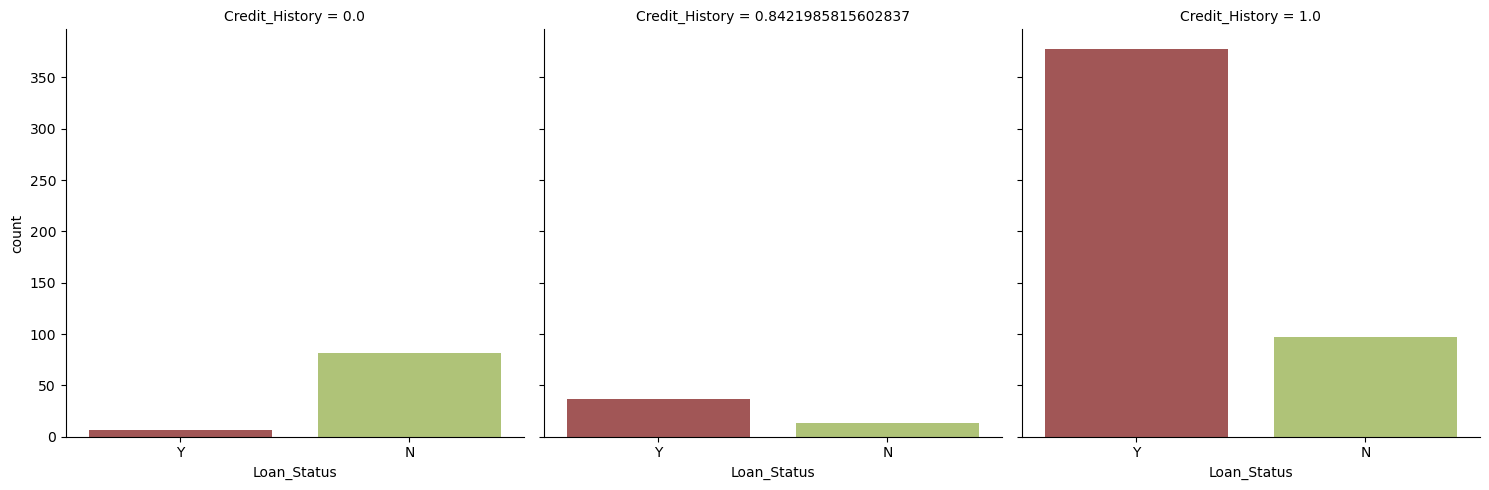

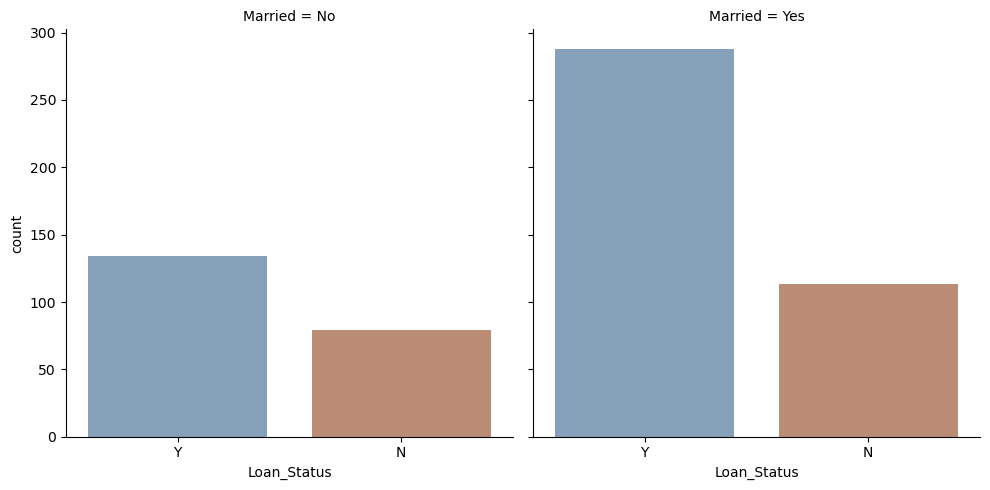

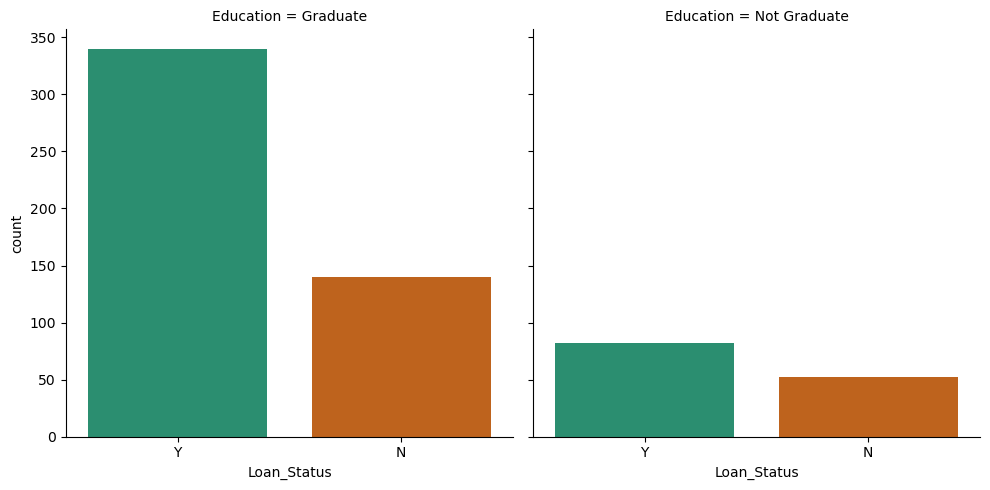

In [294]:
sns.catplot(x='Loan_Status',col='Gender', data=df, kind='count', palette='spring_r')
sns.catplot(x='Loan_Status',col='Credit_History', data=df, kind='count', palette='tab20b_r')
sns.catplot(x='Loan_Status',col='Married', data=df, kind='count', palette='twilight_shifted')
sns.catplot(x='Loan_Status',col='Education', data=df, kind='count', palette='Dark2')
plt.show()

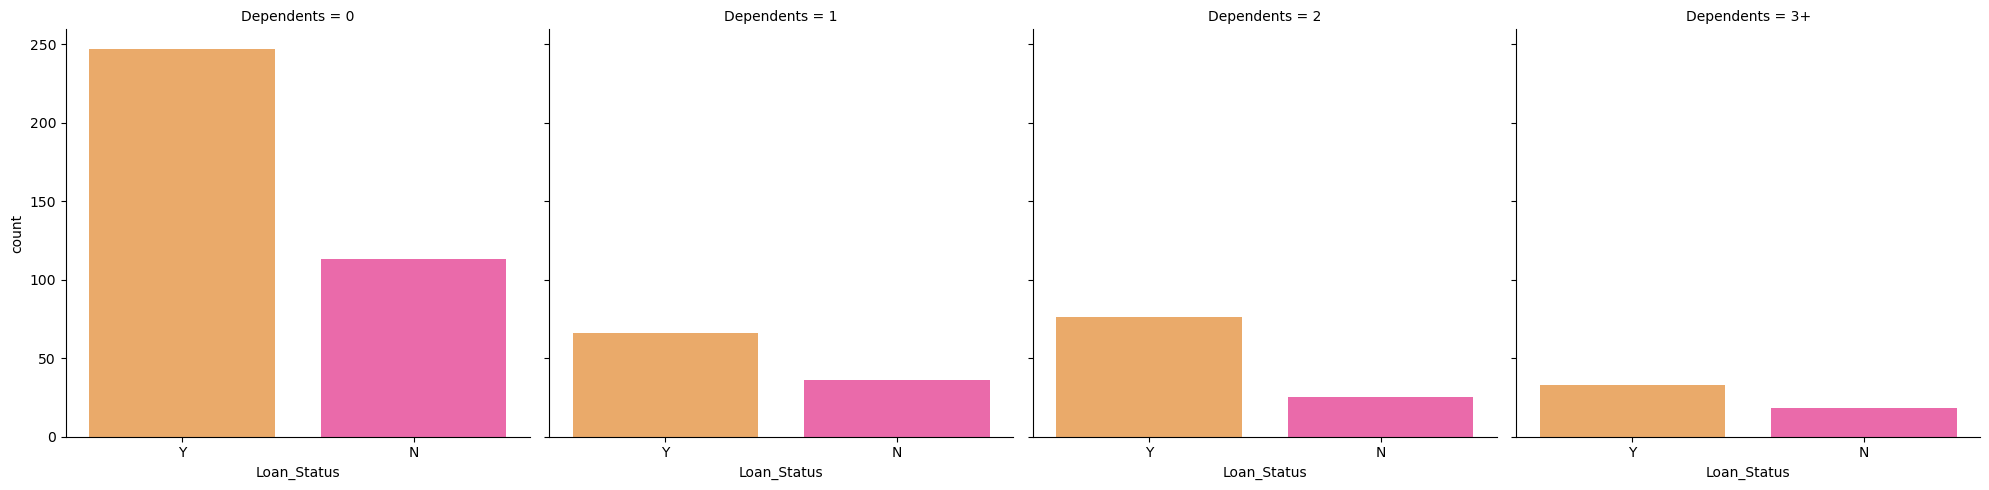

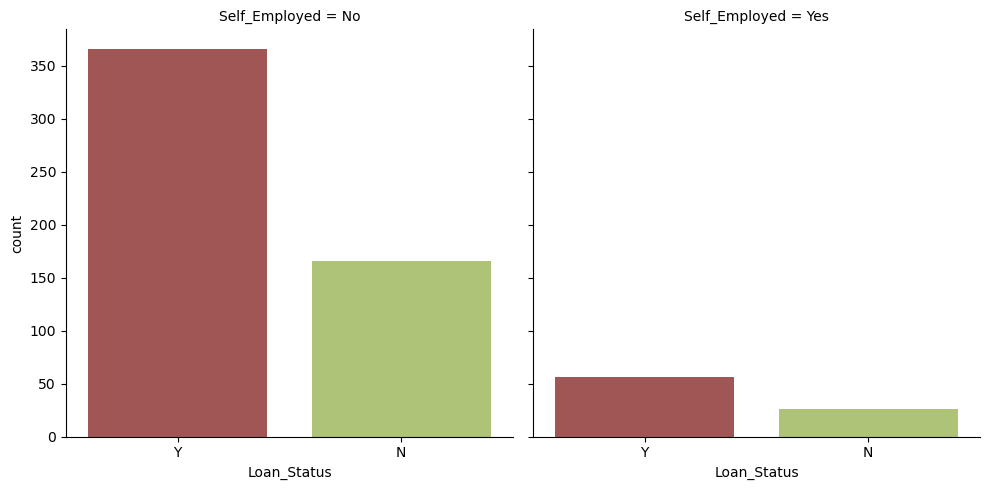

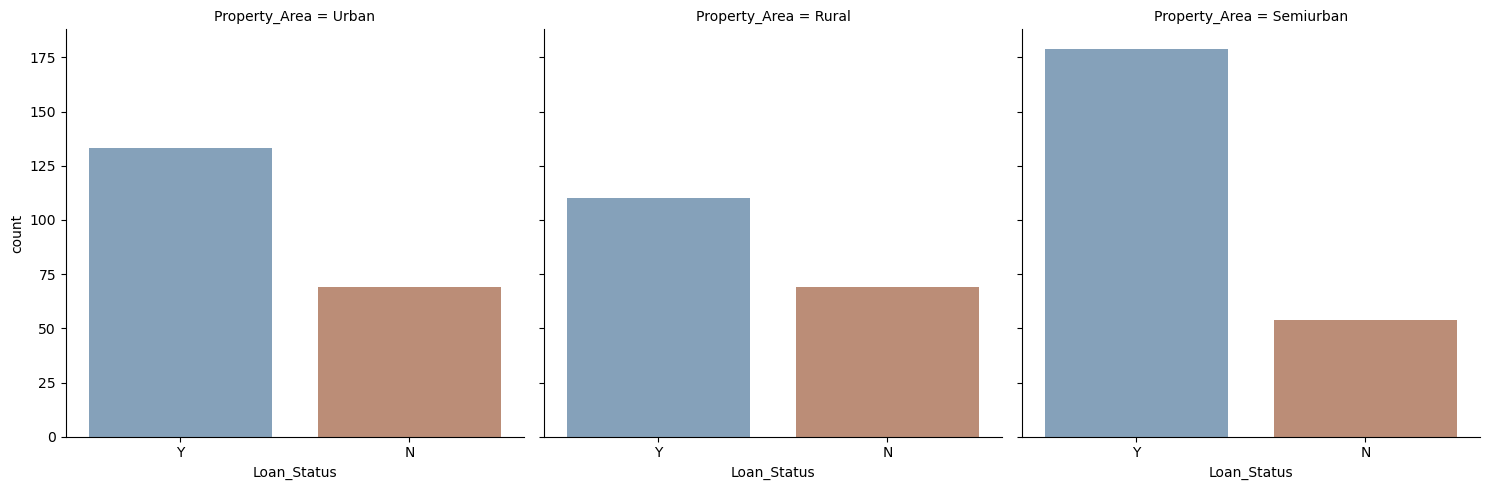

In [295]:
sns.catplot(x='Loan_Status',col='Dependents', data=df, kind='count', palette='spring_r')
sns.catplot(x='Loan_Status',col='Self_Employed', data=df, kind='count', palette='tab20b_r')
sns.catplot(x='Loan_Status',col='Property_Area', data=df, kind='count', palette='twilight_shifted')
plt.show()

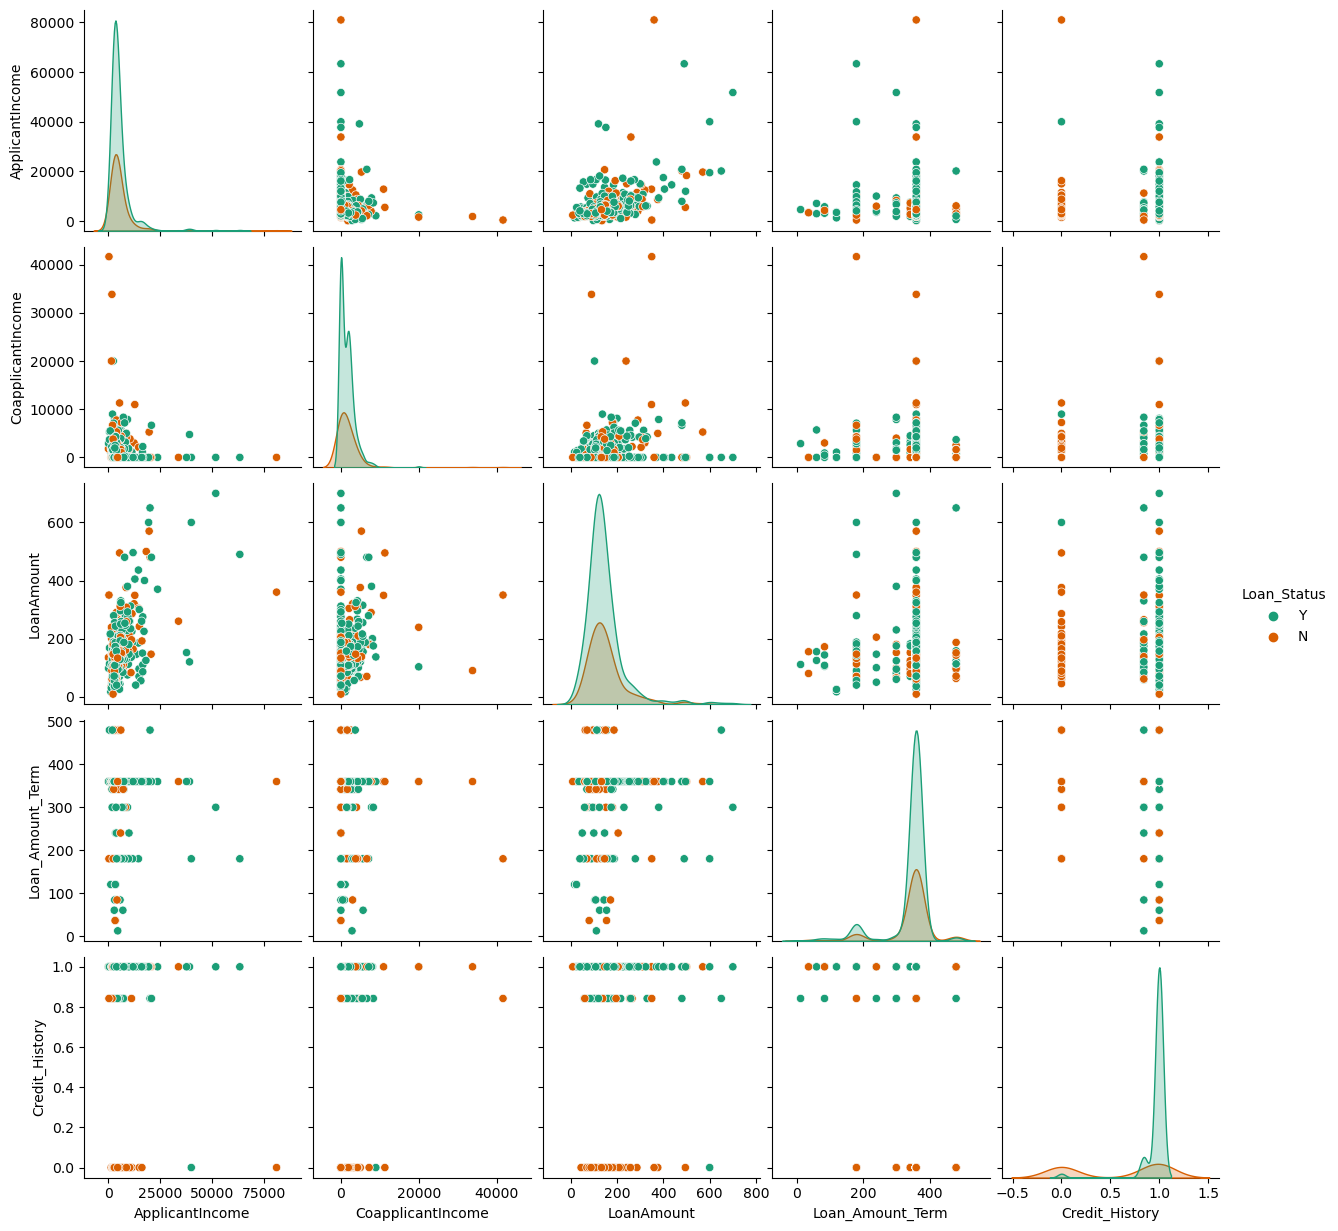

In [296]:
sns.pairplot(df,hue='Loan_Status',palette='Dark2')
plt.show()

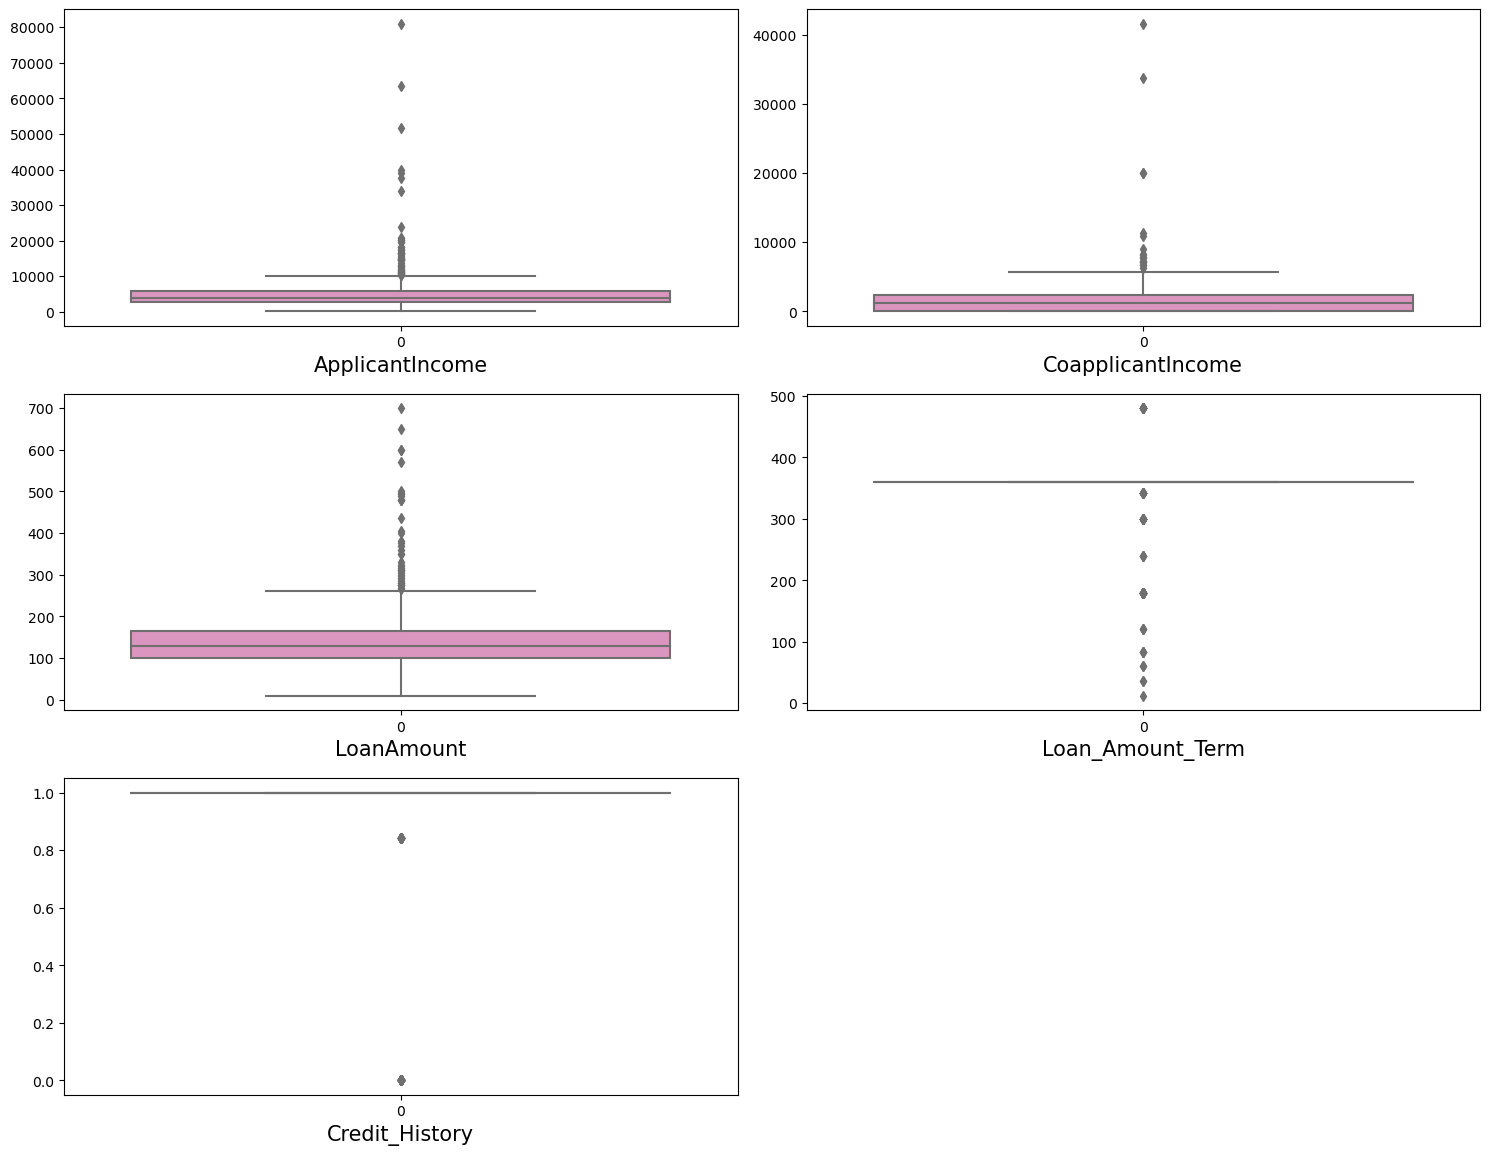

In [297]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [298]:
from scipy.stats import zscore
out_features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
z=np.abs(zscore(out_features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.072991,0.554487,0.000000
1,0.134412,0.038732,0.219273
2,0.393747,0.554487,0.957641
3,0.462062,0.251980,0.314547
4,0.097728,0.554487,0.064454
...,...,...,...
609,0.410130,0.554487,0.898095
610,0.212557,0.554487,1.267279
611,0.437174,0.472404,1.269371
612,0.357064,0.554487,0.483367


In [299]:
np.where(z>3)

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
        333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
        581, 600, 604], dtype=int64),
 array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
        2, 2, 2, 2, 1, 1, 2], dtype=int64))

In [300]:
df1=df[(z<3).all(axis=1)]
df1.shape

(589, 12)

In [301]:
print('old dataframe:', df.shape[0])
print('new dataframe:', df1.shape[0])

old dataframe: 614
new dataframe: 589


In [302]:
print('Data loss percentage:', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage: 4.071661237785016


In [303]:
df=df1

# checking for Skewness

In [304]:
p= df.skew()
p

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.433130
Credit_History      -1.953298
dtype: float64

In [305]:
from scipy.stats import boxcox
df['ApplicantIncome']=boxcox(df['ApplicantIncome'],0)

In [306]:
df['LoanAmount']=boxcox(df['LoanAmount'],0)

In [307]:
df.skew()

ApplicantIncome     -0.207659
CoapplicantIncome    1.353191
LoanAmount          -0.914952
Loan_Amount_Term    -2.433130
Credit_History      -1.953298
dtype: float64

In [308]:
df['Loan_Amount_Term']=boxcox(df['Loan_Amount_Term'],1)

In [309]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,8.674026,0.0,4.986426,359.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,8.430109,1508.0,4.852030,359.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,8.006368,0.0,4.189655,359.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,7.856707,2358.0,4.787492,359.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,8.699515,0.0,4.948760,359.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,7.972466,0.0,4.262680,359.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,8.320205,0.0,3.688879,179.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8.996157,240.0,5.533389,359.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,8.933664,0.0,5.231109,359.0,1.0,2.0,1.0


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             589 non-null    float64
 1   Married            589 non-null    float64
 2   Dependents         589 non-null    float64
 3   Education          589 non-null    float64
 4   Self_Employed      589 non-null    float64
 5   ApplicantIncome    589 non-null    float64
 6   CoapplicantIncome  589 non-null    float64
 7   LoanAmount         589 non-null    float64
 8   Loan_Amount_Term   589 non-null    float64
 9   Credit_History     589 non-null    float64
 10  Property_Area      589 non-null    float64
 11  Loan_Status        589 non-null    float64
dtypes: float64(12)
memory usage: 59.8 KB


In [311]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.814941,0.650255,0.724958,0.227504,0.129032,8.289818,1415.660306,4.818728,341.050934,0.841398,1.035654,0.691002
std,0.388676,0.477295,0.996118,0.419577,0.335521,0.552641,1653.363445,0.444223,64.340433,0.350787,0.789225,0.462473
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.010635,0.000000,2.197225,11.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.963112,0.000000,4.605170,359.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,8.229511,1229.000000,4.852030,359.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,8.613049,2253.000000,5.075174,359.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,9.936294,8980.000000,5.940171,479.000000,1.000000,2.000000,1.000000


In [313]:
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.000841,0.060136,0.190220,0.158954,-0.084495,0.016096,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.004453,-0.024120,0.229956,0.175151,-0.100764,0.012408,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.055481,0.105754,-0.033734,0.120909,-0.088304,-0.014654,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.003507,-0.167415,-0.045701,-0.111623,-0.079807,-0.078559,-0.065623,-0.092852
Self_Employed,0.000841,-0.004453,0.055481,-0.003507,1.000000,0.211160,-0.050266,0.097263,-0.054191,-0.012904,-0.030248,-0.016617
ApplicantIncome,0.060136,-0.024120,0.105754,-0.167415,0.211160,1.000000,-0.238405,0.403828,-0.042325,0.030502,-0.015572,-0.002653
CoapplicantIncome,0.190220,0.229956,-0.033734,-0.045701,-0.050266,-0.238405,1.000000,0.299552,-0.037447,-0.020389,-0.087735,0.044815
LoanAmount,0.158954,0.175151,0.120909,-0.111623,0.097263,0.403828,0.299552,1.000000,0.109504,-0.024180,-0.109490,-0.035989
Loan_Amount_Term,-0.084495,-0.100764,-0.088304,-0.079807,-0.054191,-0.042325,-0.037447,0.109504,1.000000,-0.007756,-0.071976,-0.021418
Credit_History,0.016096,0.012408,-0.014654,-0.078559,-0.012904,0.030502,-0.020389,-0.024180,-0.007756,1.000000,-0.007020,0.555902


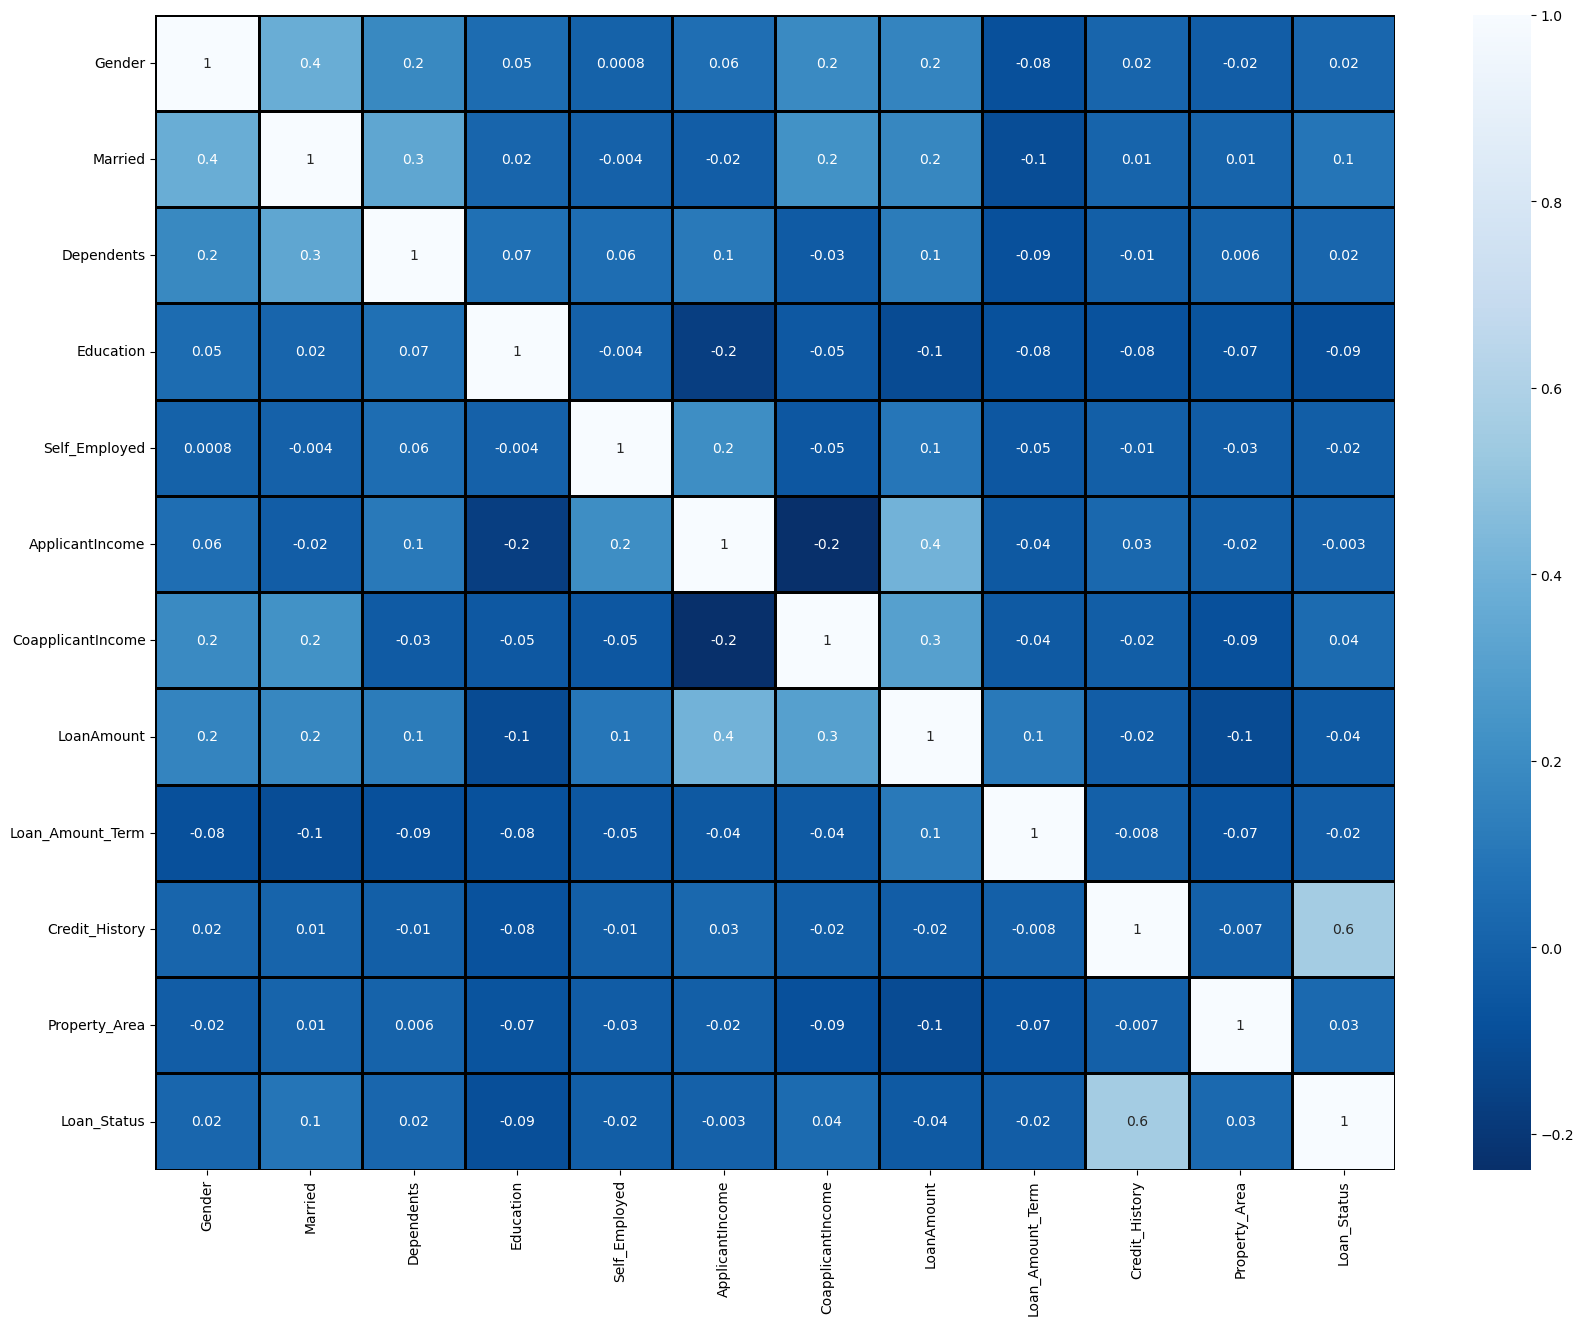

In [314]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0-1,fmt='.1g',linecolor='black', annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [316]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.555902
Married              0.095124
CoapplicantIncome    0.044815
Property_Area        0.034894
Gender               0.021942
Dependents           0.021937
ApplicantIncome     -0.002653
Self_Employed       -0.016617
Loan_Amount_Term    -0.021418
LoanAmount          -0.035989
Education           -0.092852
Name: Loan_Status, dtype: float64

In [318]:
df.drop('ApplicantIncome', axis=1, inplace=True)

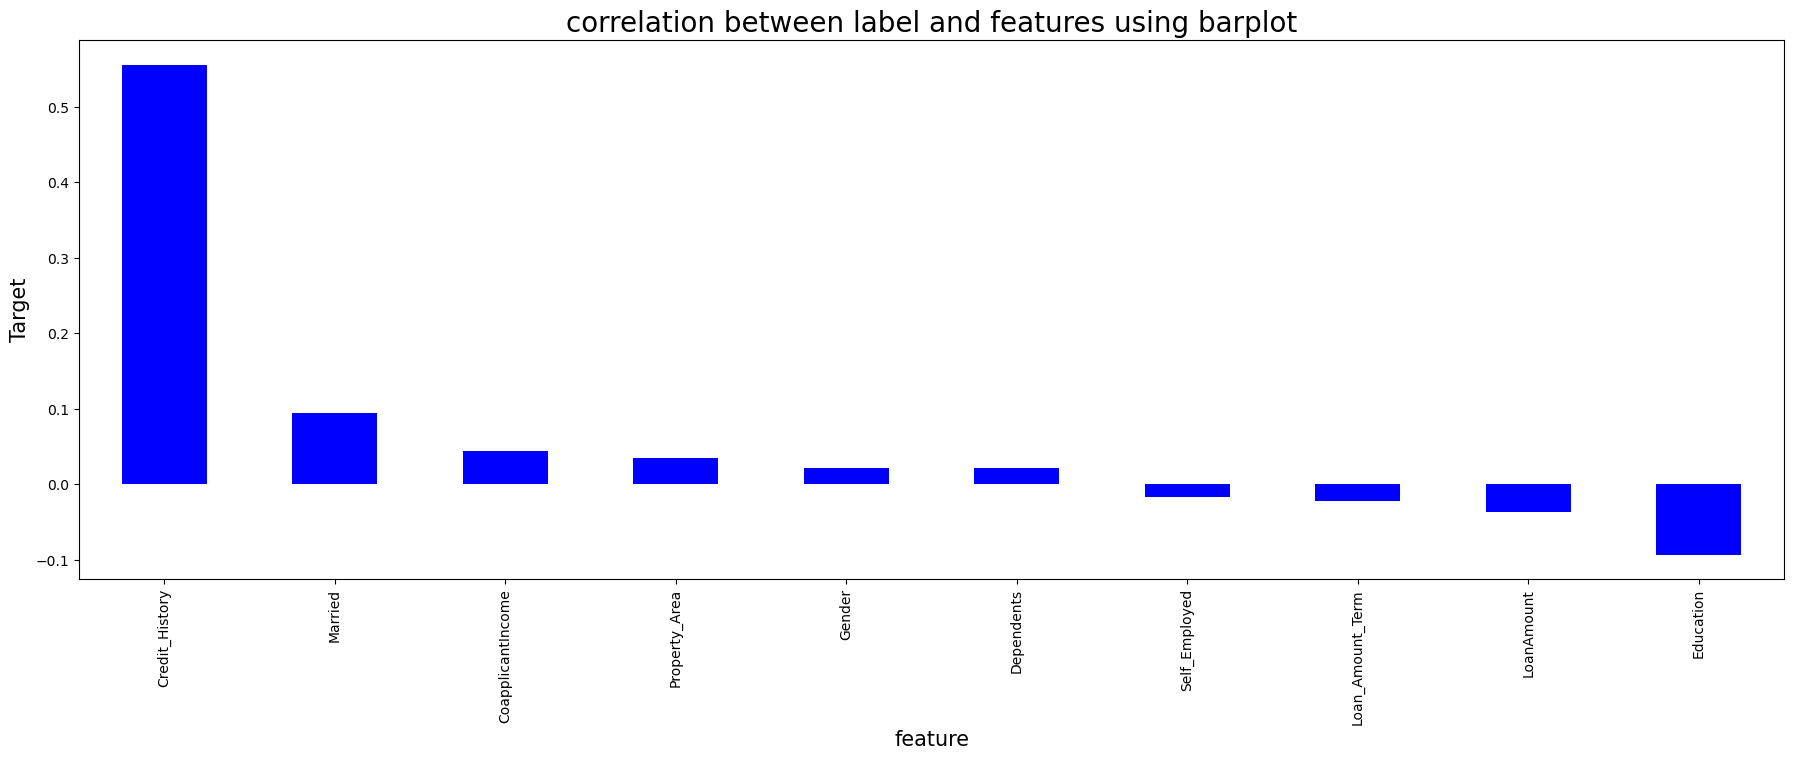

In [319]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='b')
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and features using barplot',fontsize=20)
plt.show()

# Seperating features and Label

In [320]:
x=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

In [321]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,-0.856958,0.377829,0.279207,0.452517,1.222929
1,0.476533,0.733389,0.276349,-0.542684,-0.384900,0.055897,0.075032,0.279207,0.452517,-1.313356
2,0.476533,0.733389,-0.728402,-0.542684,2.598076,-0.856958,-1.417323,0.279207,0.452517,1.222929
3,0.476533,0.733389,-0.728402,1.842694,-0.384900,0.570438,-0.070376,0.279207,0.452517,1.222929
4,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,-0.856958,0.292967,0.279207,0.452517,1.222929
...,...,...,...,...,...,...,...,...,...,...
584,-2.098492,-1.363533,-0.728402,-0.542684,-0.384900,-0.856958,-1.252795,0.279207,0.452517,-1.313356
585,0.476533,0.733389,2.285851,-0.542684,-0.384900,-0.856958,-2.545587,-2.520789,0.452517,-1.313356
586,0.476533,0.733389,0.276349,-0.542684,-0.384900,-0.711676,1.610158,0.279207,0.452517,1.222929
587,0.476533,0.733389,1.281100,-0.542684,-0.384900,-0.856958,0.929108,0.279207,0.452517,1.222929


# Checking Variance inflation Factor(removing biasness)

In [322]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['feature']=x.columns
vif

,VIF values,feature
0,1.200371,Gender
1,1.336750,Married
2,1.174380,Dependents
3,1.041520,Education
4,1.024723,Self_Employed
5,1.193628,CoapplicantIncome
6,1.197147,LoanAmount
7,1.053317,Loan_Amount_Term
8,1.009439,Credit_History
9,1.030116,Property_Area


In [323]:
y.value_counts()

1.0    407
0.0    182
Name: Loan_Status, dtype: int64

In [324]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [325]:
y1.value_counts()

1.0    407
0.0    407
Name: Loan_Status, dtype: int64

# Modelling

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAcc=acc
        maxRS=i
print('Best accuracy is', maxAcc,'at rand_state',maxRS)

Best accuracy is 0.8040816326530612 at rand_state 299


# creating a test train split

In [328]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [329]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [330]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7231638418079096
[[ 18  38]
 [ 11 110]]
              precision    recall  f1-score   support

         0.0       0.62      0.32      0.42        56
         1.0       0.74      0.91      0.82       121

    accuracy                           0.72       177
   macro avg       0.68      0.62      0.62       177
weighted avg       0.70      0.72      0.69       177



In [331]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7627118644067796
[[ 17  39]
 [  3 118]]
              precision    recall  f1-score   support

         0.0       0.85      0.30      0.45        56
         1.0       0.75      0.98      0.85       121

    accuracy                           0.76       177
   macro avg       0.80      0.64      0.65       177
weighted avg       0.78      0.76      0.72       177



In [332]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7627118644067796
[[ 17  39]
 [  3 118]]
              precision    recall  f1-score   support

         0.0       0.85      0.30      0.45        56
         1.0       0.75      0.98      0.85       121

    accuracy                           0.76       177
   macro avg       0.80      0.64      0.65       177
weighted avg       0.78      0.76      0.72       177



In [333]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7062146892655368
[[ 20  36]
 [ 16 105]]
              precision    recall  f1-score   support

         0.0       0.56      0.36      0.43        56
         1.0       0.74      0.87      0.80       121

    accuracy                           0.71       177
   macro avg       0.65      0.61      0.62       177
weighted avg       0.68      0.71      0.69       177



In [334]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=svc.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7627118644067796
[[ 17  39]
 [  3 118]]
              precision    recall  f1-score   support

         0.0       0.85      0.30      0.45        56
         1.0       0.75      0.98      0.85       121

    accuracy                           0.76       177
   macro avg       0.80      0.64      0.65       177
weighted avg       0.78      0.76      0.72       177



In [335]:
BC=BaggingClassifier ()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.6779661016949152
[[22 34]
 [23 98]]
              precision    recall  f1-score   support

         0.0       0.49      0.39      0.44        56
         1.0       0.74      0.81      0.77       121

    accuracy                           0.68       177
   macro avg       0.62      0.60      0.61       177
weighted avg       0.66      0.68      0.67       177



In [336]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=svc.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7627118644067796
[[ 17  39]
 [  3 118]]
              precision    recall  f1-score   support

         0.0       0.85      0.30      0.45        56
         1.0       0.75      0.98      0.85       121

    accuracy                           0.76       177
   macro avg       0.80      0.64      0.65       177
weighted avg       0.78      0.76      0.72       177



# Cross Validation

In [337]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predRFC)-score.mean())

[0.73619632 0.74846626 0.88957055 0.85889571 0.90740741]
0.8281072483526473
difference btw accuracy score and crossvalidation score is -0.10494340654473766


In [338]:
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predLR)-score.mean())

[0.69325153 0.73619632 0.69325153 0.6993865  0.67283951]
0.6989850791486784
difference btw accuracy score and crossvalidation score is 0.06372678525810127


In [339]:
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and cross validation score is',accuracy_score(y_test,predsvc)-score.mean())

[0.68711656 0.74846626 0.69325153 0.73006135 0.72222222]
0.716223585548739
difference btw accuracy score and cross validation score is 0.04648827885804063


In [340]:
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predGB)-score.mean())

[0.68711656 0.72392638 0.82822086 0.82822086 0.86419753]
0.7863364386881769
difference btw accuracy score and crossvalidation score is -0.08012174942264016


In [341]:
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predABC)-score.mean())

[0.67484663 0.75460123 0.76687117 0.84662577 0.77777778]
0.7641445126107702
difference btw accuracy score and crossvalidation score is -0.001432648203990583


In [342]:
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predBC)-score.mean())

[0.6809816  0.6809816  0.85276074 0.82208589 0.82098765]
0.7715594940543816
difference btw accuracy score and crossvalidation score is -0.0935933923594664


In [343]:
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predET)-score.mean())

[0.74233129 0.78527607 0.85276074 0.85276074 0.89506173]
0.8256381125501779
difference btw accuracy score and crossvalidation score is -0.06292624814339831


# Hyperparameter Tunning

In [344]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','Entropy','log_loss'],
          'random_state':[10,50,1000],
          'max_depth':[1,10,20],
          'n_jobs':[-2,-1,1],
          'n_estimators':[10,100,200,300]}

In [345]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [346]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'Entropy', 'log_loss'],
                         'max_depth': [1, 10, 20],
                         'n_estimators': [10, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [347]:
GCV.best_params_ 

{'criterion': 'gini',
 'max_depth': 1,
 'n_estimators': 10,
 'n_jobs': -2,
 'random_state': 10}

In [348]:
Final_model=RandomForestClassifier(criterion='gini',max_depth=1, n_estimators=10, n_jobs=-2, random_state=10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

70.62146892655367


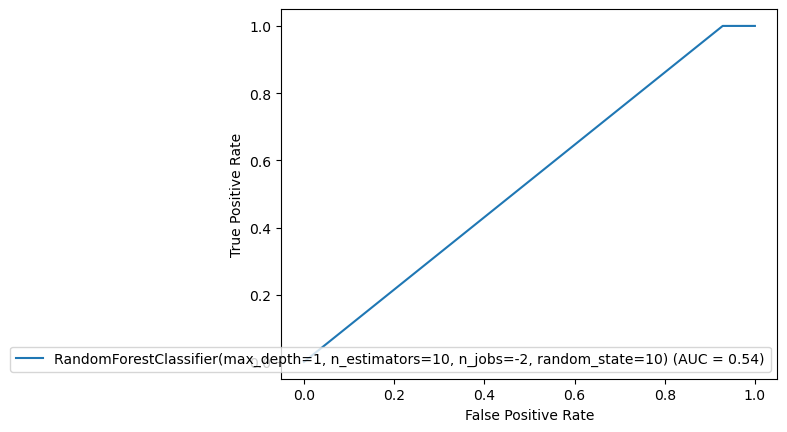

In [349]:
from sklearn import metrics
fpr,tpr, threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [351]:
import joblib
joblib.dump(Final_model,'loan application.pkl')

['loan application.pkl']